# <center> Data Project 1: Investigating IMDB Film Data </center>
#### <center> By Eric Fraser </center>

### Introduction

Iconic films are tied so tightly to American culture that even people who do not watch films regularly are familiar with them. I chose this data set because I love watching good movies, and I am interested in how the film industry has evolved over time. 

The IMDB CSV set includes data on films released between 1960 and 2015. This dataset has information on over 10,000 films, so while not an overwhelmingly large set, there are hundreds of questions that could be explored. 

While looking through this data set, a few different items caught my eye. Because of my interest in film history, I was particularly curious how film ratings have changed over time. One of the questions I will be answering is two-part:

**1a. How has the overall quality of films changed since the 1960s?**

**1b. If there is a trend, what are some possible reasons for the trend?**

Nobody likes bad movies. I'm curious -- which year should you probably have gone to the cinema more, and which year should you probably have done something else?

**2a. What was the best rated year for films?**

**2b. What was the worst rated year for films?**

**2c. What was the most average rating year for films?**

Naturally, film ratings, even by professional critics are a subjective measurement -- if you ask 100 people what their favorite movie is you might just get 100 different answers. However, there is reason to believe in a film's supposed objective quality if an overwhelming number of people rated it highly. 

Most of the data in the table was already cleaned and each row had a value for IMDB rating, so there wasn't much to do initially regarding data wrangling/cleaning.

Onto the analysis.



### Importing Libraries and Reading Data using PANDAS


In [81]:
import pandas as pd
import numpy as np
import os
import unicodecsv
import matplotlib

film_data = pd.read_csv("tmdb-movies.csv")   
dataframe_film_data = pd.DataFrame(film_data)

# The purpose of the above code is to import pandas, numpy, and other libraries into the notebook.
# The CSV file containing the dataset is then read into the notebook and contained in the variable "film_data".


### Question Set 1
##### 1a. How has the overall quality of films changed since the 1960s?
##### 1b. If there is a trend, what are some possible reasons for the trend?



release_year
1960    6.32
1961    6.37
1962    6.34
1963    6.33
1964    6.21
1965    6.19
1966    6.13
1967    6.24
1968    6.38
1969    5.96
1970    6.42
1971    6.42
1972    6.53
1973    6.70
1974    6.40
1975    6.39
1976    6.34
1977    6.15
1978    6.13
1979    6.31
1980    6.16
1981    6.17
1982    6.24
1983    5.97
1984    6.00
1985    6.18
1986    6.00
1987    6.13
1988    5.97
1989    6.07
1990    5.99
1991    6.01
1992    6.08
1993    6.05
1994    5.94
1995    6.06
1996    5.90
1997    5.99
1998    5.97
1999    6.03
2000    5.88
2001    5.90
2002    5.97
2003    5.93
2004    5.99
2005    5.87
2006    5.94
2007    5.96
2008    5.93
2009    5.86
2010    5.99
2011    5.96
2012    5.80
2013    5.88
2014    5.92
2015    5.89
Name: vote_average, dtype: float64


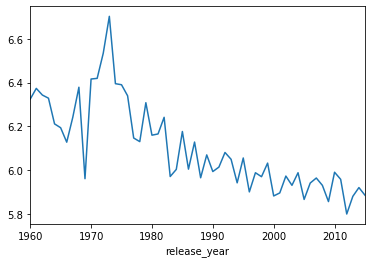

In [140]:

rating_by_release_year = dataframe_film_data.groupby("release_year").mean()["vote_average"] 
print(rating_by_release_year.round(2))

rating_by_release_year.plot()

#First I took the film_data dataframe and used the groupby function to group the data by release year
#Then I took the mean of all scores for films during that year and rounded the ratings to 2 decimal places
#This data is much more impactful when viewed graphically, so I plotted the data as well to see what was going on visually
#You can see the results below:


It's easy to tell looking at the data and graph that overall quality of movies appears to be decreasing throughout the years. However, this data does not share the full story. I wondered what could be the reason for this decline in quality? Were movies actually getting worse over the years? Is nostalgia such a powerful force that movies from the critic's childhoods were favored disproportionately over modern movies?

We need more information. My first thought was that the total number of films released year to year may have something to do with this. 

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    490
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


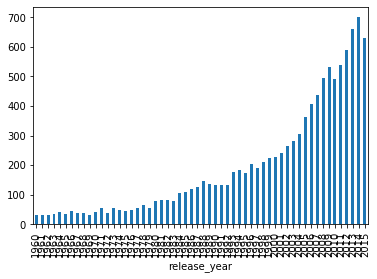

In [185]:
film_count_by_year = dataframe_film_data.groupby("release_year").count()["id"]
print(film_count_by_year)

film_count_by_year.plot('bar')

#Similar to above, this code utilizes the count function to count the unique IDs in each grouped year
#Again, the data is graphed visually below:

As you can easily tell by the graph, the number of films released and reviewed per year is increasing at an exponential rate. Perhaps one reason the average quality is decreasing is that a huge number of bad films are bringing down the average. To discover if this is the case, I decided to check the highest and lowest rated films of each year. The data for the highest rated film each year is below

release_year
1960    8.0
1961    7.5
1962    7.7
1963    7.5
1964    7.7
1965    7.6
1966    7.9
1967    7.6
1968    7.7
1969    7.3
1970    7.6
1971    7.7
1972    8.3
1973    7.7
1974    8.1
1975    8.0
1976    7.8
1977    7.9
1978    8.0
1979    7.8
1980    8.0
1981    8.5
1982    7.9
1983    8.1
1984    8.4
1985    8.3
1986    8.0
1987    7.7
1988    8.0
1989    8.4
1990    8.0
1991    7.9
1992    8.4
1993    8.1
1994    8.4
1995    8.5
1996    7.9
1997    7.8
1998    8.0
1999    8.1
2000    8.5
2001    8.0
2002    8.3
2003    8.0
2004    7.8
2005    8.3
2006    8.7
2007    7.9
2008    8.5
2009    8.3
2010    8.8
2011    9.2
2012    8.3
2013    8.5
2014    8.8
2015    8.9
Name: vote_average, dtype: float64


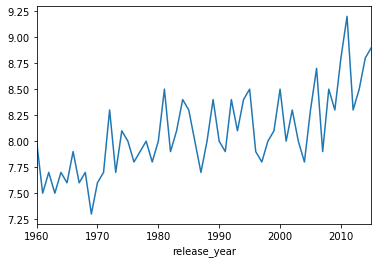

In [181]:
best_film_per_year = dataframe_film_data.groupby("release_year").max()["vote_average"]

print(best_film_per_year)

best_film_per_year.plot()

#This code pulls the highest rated film and score of the film for each year and adds it 
#to the best_film_per_year variable


It looks like that although the average film score goes down year to year, the highest end films are generally improving in quality over time. We will do the same for the worst films each year below:

release_year
1960    4.9
1961    4.6
1962    4.9
1963    5.0
1964    4.6
1965    4.4
1966    1.5
1967    4.6
1968    5.4
1969    3.9
1970    3.0
1971    2.9
1972    5.3
1973    4.8
1974    4.8
1975    3.8
1976    4.6
1977    4.6
1978    3.1
1979    3.0
1980    3.6
1981    4.2
1982    3.0
1983    2.7
1984    3.6
1985    4.3
1986    3.5
1987    2.8
1988    3.8
1989    2.3
1990    3.8
1991    3.1
1992    4.0
1993    3.4
1994    3.9
1995    3.5
1996    3.3
1997    3.2
1998    2.9
1999    3.4
2000    3.5
2001    3.6
2002    3.3
2003    3.4
2004    2.1
2005    2.5
2006    2.8
2007    1.5
2008    2.6
2009    3.1
2010    2.1
2011    2.1
2012    2.0
2013    2.2
2014    2.4
2015    2.4
Name: vote_average, dtype: float64


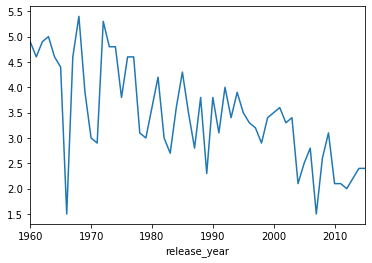

In [150]:
worst_film_per_year = dataframe_film_data.groupby("release_year").min()["vote_average"]
print(worst_film_per_year)
worst_film_per_year.plot()

#This cell works similarly to the previous cell, except it finds the worst film instead
#of the best one

Interestingly, the best films appear to be getting better, and the worst films appear to be getting worse, and the overall quality is decreasing 


### Question Set 2
##### 2a. What was the best rated year for films?
##### 2b. What was the worst rated year for films?
##### 2c. What was the most average rating year for films?


In [170]:


print(rating_by_release_year.sort_values(ascending=False))



release_year
1973    6.703636
1972    6.535000
1971    6.420000
1970    6.417073
1974    6.395745
1975    6.390909
1968    6.379487
1961    6.374194
1962    6.343750
1976    6.340426
1963    6.329412
1960    6.325000
1979    6.308772
1967    6.242500
1982    6.241975
1964    6.211905
1965    6.194286
1985    6.177064
1981    6.165854
1980    6.160256
1977    6.147368
1978    6.130769
1987    6.128800
1966    6.128261
1992    6.081203
1989    6.070073
1995    6.056000
1993    6.050000
1999    6.032589
1991    6.014286
1986    6.004959
1984    6.003810
1990    5.993939
2010    5.990816
2004    5.988599
1997    5.988542
2002    5.973308
1983    5.971250
1998    5.970476
1988    5.965517
2007    5.964384
1969    5.961290
2011    5.958519
1994    5.942391
2006    5.941422
2003    5.930961
2008    5.930847
2014    5.920714
1996    5.900980
2001    5.896281
2015    5.885692
2000    5.882379
2013    5.880577
2005    5.866484
2009    5.856660
2012    5.799830
Name: vote_average, dtype: float64


According to the data, 1973 was on average the best quality year for films. Here are a couple top films released that year:

<blockquote> The Exorcist, Mean Streets, Papillon, A Charlie Brown Thanksgiving, and Charlotte's Web were all realeased in 1973  </blockquote>

Based on average rating, it appears 2012 was the worst quality year for films. Here are a couple bottom-feeders from 2012:

<blockquote> Battleship, Snow White and the Huntsman, The Three Stooges, and Silent Hill: Revelation 3D were all released in 2012 </blockquote>

Though 2012 was the worst year overall for films, there were still some gems that year. Django Unchained, The Perks of Being a Wallflower, and The Dark Knight Rises all achieved at least a 7.5 rating. 

So what is the most average year for movies?

In [173]:
print(rating_by_release_year.mean())

#This code takes the code block above and effectively determines
#the mean of the data set across all years.

6.104771767682126


Using the table above and referencing the average we just calculated, we can see that there are two years that would qualify for the most average years for movies ratings-wise -- both 1992 and 1966 fall right around the mean, with 1987 a close third. 